# Plot moment 0 map focused on certain source and with gas contours

### Import packages

In [1]:
from astropy.io import fits
from astropy.coordinates import SkyCoord
import aplpy
from astropy import units as u  
from spectral_cube import SpectralCube
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import numpy as np 

### Import data files

In [2]:
filename='/home/jp/Desktop/Research/Data2.0/Serpens/Serpens_concat_c18o_cube.fits'

In [3]:
filenametxt='/home/jp/Desktop/Research/Data/sourcecoordinates.txt'

### Specify source(s) to focus on

In [4]:
source=16
source2=18

### Find source coordinates

In [5]:
ra,dec = np.loadtxt(filenametxt,unpack=True,usecols=(0,1),dtype='S')

In [6]:
Ra=[]
Dec=[]
for i in range(len(ra)):
    Ra.append(ra[i].decode("utf-8"))
for i in range(len(dec)):
    Dec.append(dec[i].decode("utf-8"))

In [7]:
coord=SkyCoord(Ra,Dec,frame='icrs',unit=(u.hourangle,u.deg))

### Collapse cube to make Moment-0

In [8]:
cube0=SpectralCube.read(filename)
moment_0=cube0.moment(order=0)

### Create figure

In [9]:
fig = plt.figure('Source '+str(source)+' and '+str(source2),figsize=(15,15)) 

### Source info

In [10]:
c = SkyCoord(coord[source-1].ra,coord[source-1].dec, frame='icrs',unit=(u.hourangle,u.deg)) 
RAcoord=c.ra
Deccoord=c.dec
vc=8.0*u.km/u.s 

### Make moment 0 map

In [11]:
f2 = aplpy.FITSFigure(moment_0.hdu, figure=fig)
mom0_vmin = moment_0[~np.isnan(moment_0)].min().value*0.6
mom0_vmax = moment_0[~np.isnan(moment_0)].max().value*0.6
f2.show_grayscale(vmin=mom0_vmin,vmax=mom0_vmax,invert=True)

### Recenter plot

In [12]:
xx=np.abs(cube0.header['NAXIS1']*cube0.header['cdelt1'])
yy=np.abs(cube0.header['NAXIS2']*cube0.header['cdelt2'])

### Show source label

In [13]:
f2.add_label(coord[source-1].ra.value,coord[source-1].dec.value,str(source),size=14,color='red')
f2.add_label(coord[source2-1].ra.value,coord[source2-1].dec.value,str(source2),size=14,color='red')

### Show markers

In [14]:
f2.show_markers(coord[source-1].ra.value,coord[source-1].dec.value, layer='marker_set_1',edgecolor='green',
                marker='x', s=10, linewidths=0.8)
f2.show_markers(coord[source2-1].ra.value,coord[source2-1].dec.value, layer='marker_set_1',edgecolor='green',
                marker='x', s=10, linewidths=0.8)

### Show blueshifted and redshifted contours

In [15]:
velwhole = cube0.spectral_axis.to(u.km/u.s)
omitvel=0.4*u.km/u.s 
minimumvelocity = min(velwhole)
maximumvelocity = vc-omitvel
blucube = cube0.spectral_slab(min(velwhole),(vc-omitvel))
redcube = cube0.spectral_slab((vc+omitvel),max(velwhole))
 
print('BLUE cube v$_{LSR}=$%.1f to %.1f %s'%(min(velwhole).value,(vc-omitvel).value,velwhole.unit))
print('RED cube v$_{LSR}=$%.1f to %.1f %s'%((vc+omitvel).value,max(velwhole).value,velwhole.unit))

moment_0_blu = blucube.moment(order=0)
moment_0_red = redcube.moment(order=0)

BLUE cube v$_{LSR}=$2.0 to 7.6 km / s
RED cube v$_{LSR}=$8.4 to 13.9 km / s


In [16]:
mom0_rmsb=moment_0_blu[689:719,939:977].std().value

mom0_rmsr=moment_0_red[2259:2345,1886:1976].std().value

f2.show_contour(moment_0_blu.hdu,colors='blue',levels=np.linspace(3.,18.,12)*mom0_rmsb,linewidths=2.0)

f2.show_contour(moment_0_red.hdu,colors='red',levels=np.linspace(3.,18.,12)*mom0_rmsr,linewidths=2.0)

### Recenter

In [17]:
f2.recenter(RAcoord+0.0*u.arcsec,Deccoord+0.0*u.arcsec,width=xx*0.042,height=yy*0.032)

### Add beamsize

In [18]:
bmaj=1.043*u.arcsec.to(u.deg)
bmin=0.7046*u.arcsec.to(u.deg)
bpa=76.299
f2.add_beam(major=bmaj,minor=bmin,angle=bpa,pad=0.2)

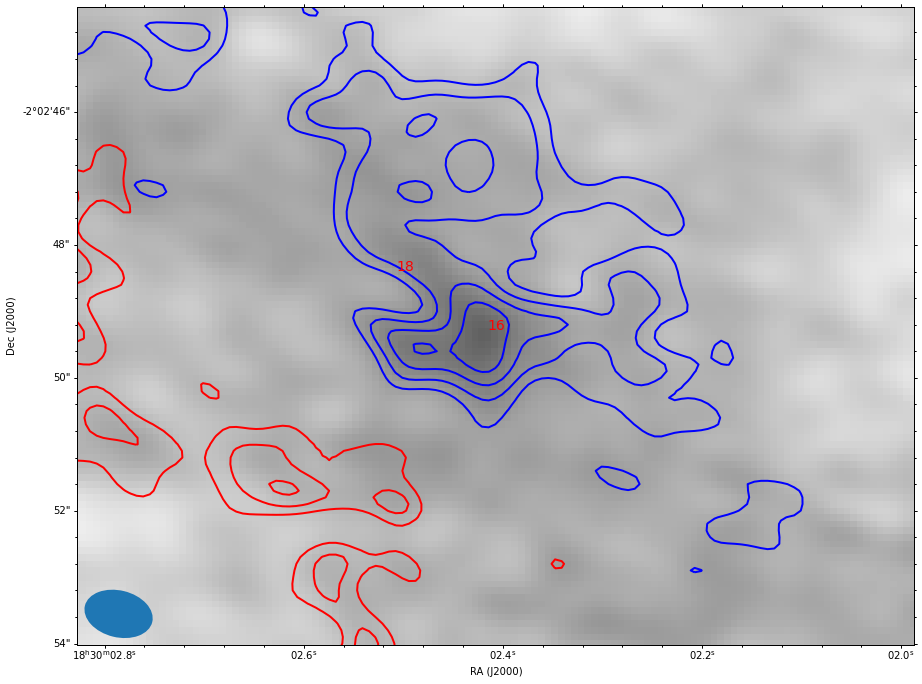

In [19]:
fig